<a href="https://colab.research.google.com/github/sandeshchand/Regressionbytf2/blob/main/Regression_By_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


In [ ]:
dataset=keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset

'/root/.keras/datasets/auto-mpg.data'

In [ ]:
import pandas as pd

columns_name=['MPG','Cylinders','Dispalcement','Horsepower','Weight',
              'Acceleration','Model Year','Origin']
data=pd.read_csv(dataset,names=columns_name,
                 na_values="?",comment='\t',sep=" ",skipinitialspace=True)
data.head(5)

,MPG,Cylinders,Dispalcement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
data.isna().sum()

MPG             0
Cylinders       0
Dispalcement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data['Origin']=data['Origin'].map({1:'USA',2:'Europe',3:'Japan'})
#data.head(5)
data=pd.get_dummies(data,prefix='',prefix_sep='')
data.head(5)

,MPG,Cylinders,Dispalcement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [ ]:
train_data=data.sample(frac=0.8,random_state=0)
test_data=data.drop(train_data.index)

In [ ]:
traindata_stats=train_data.describe()
traindata_stats.pop("MPG")
traindata_stats=traindata_stats.transpose()
traindata_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Dispalcement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [ ]:
train_labels=train_data.pop("MPG")
test_lables=test_data.pop("MPG")

In [ ]:
traindata_stats["mean"]/traindata_stats["std"]

Cylinders        3.222583
Dispalcement     1.872093
Horsepower       2.752752
Weight           3.543378
Acceleration     5.578327
Model Year      20.648931
Europe           0.465148
Japan            0.495225
USA              1.286751
dtype: float64

In [ ]:
def norm(x):
  #print(x)
  return ((x-traindata_stats["mean"])/traindata_stats["std"])
          
normalizes_train_data = norm(train_data)
normalizes_test_data = norm(test_data)
#print(normalizes_train_data)
#print(normalizes_test_data)

     Cylinders  Dispalcement  Horsepower  ...    Europe     Japan       USA
146  -0.869348     -1.009459   -0.784052  ... -0.465148 -0.495225  0.774676
282  -0.869348     -0.530218   -0.442811  ... -0.465148 -0.495225  0.774676
69    1.483887      1.482595    1.447140  ... -0.465148 -0.495225  0.774676
378  -0.869348     -0.865687   -1.099044  ... -0.465148 -0.495225  0.774676
331  -0.869348     -0.942365   -0.994047  ... -0.465148  2.012852 -1.286751
..         ...           ...         ...  ...       ...       ...       ...
281   0.307270      0.044872   -0.521559  ... -0.465148 -0.495225  0.774676
229   1.483887      1.961837    1.972127  ... -0.465148 -0.495225  0.774676
150  -0.869348     -0.836932   -0.311564  ... -0.465148  2.012852 -1.286751
145  -0.869348     -1.076553   -1.151543  ... -0.465148  2.012852 -1.286751
182  -0.869348     -0.846517   -0.495310  ...  2.143005 -0.495225 -1.286751

[314 rows x 9 columns]
     Cylinders  Dispalcement  Horsepower  ...    Europe     Japa

In [ ]:
def build_model():
  model=keras.Sequential([
                          layers.Dense(64,activation='relu',input_shape=[len(train_data.keys())]),
                          layers.Dense(64,activation='relu'),
                          layers.Dense(1)
  ])
  optimizer=tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
               optimizer=optimizer,
               metrics=['mae','mse'])
  return model


In [ ]:
model=build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch=normalizes_train_data[:10]
example_result=model.predict(example_batch)
example_result

array([[29.249107],
       [23.758791],
       [12.889691],
       [37.50536 ],
       [35.36589 ],
       [20.530695],
       [37.84103 ],
       [30.761581],
       [19.887503],
       [23.248945]], dtype=float32)

In [ ]:
EPOCHS=1000
model_fit=model.fit(normalizes_train_data,train_labels,
                    epochs=EPOCHS,validation_split=0.2,verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()])



Epoch: 0, loss:4.7660,  mae:1.4965,  mse:4.7660,  val_loss:7.3319,  val_mae:2.0547,  val_mse:7.3319,  
....................................................................................................
Epoch: 100, loss:4.4746,  mae:1.4064,  mse:4.4746,  val_loss:7.9394,  val_mae:2.1721,  val_mse:7.9394,  
....................................................................................................
Epoch: 200, loss:3.7923,  mae:1.3016,  mse:3.7923,  val_loss:7.8834,  val_mae:2.1629,  val_mse:7.8834,  
....................................................................................................
Epoch: 300, loss:3.4861,  mae:1.2146,  mse:3.4861,  val_loss:8.7950,  val_mae:2.3064,  val_mse:8.7950,  
....................................................................................................
Epoch: 400, loss:3.2372,  mae:1.1717,  mse:3.2372,  val_loss:8.5007,  val_mae:2.3187,  val_mse:8.5007,  
........................................................................

In [ ]:
loss,mae,mse=model.evaluate(normalizes_test_data,test_lables,verbose=2)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 7.6506 - mae: 2.1595 - mse: 7.6506
Testing set Mean Abs Error:  2.16 MPG


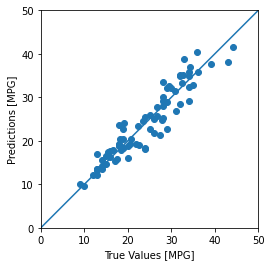

In [ ]:
test_predictions = model.predict(normalizes_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_lables, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
